### About the dataset

This dataset contains ratings for ten thousand popular books.
Ratings go from one to five.
Both book IDs and user IDs are contiguous. For books, they are 1-10000, for users, 1-53424. All users have made at least two ratings.

There are also books marked to read by the users, book metadata (author, year, etc.) and tags.

- to_read.csv provides IDs of the books marked "to read" by each user, as userid, book_id pairs
- book_tags.csv contains tags(genres) assigned by users to books. Tags in this file are represented by their IDs
- tags.csv translates tag IDs to names
- ratings.csv contains ratings

This dataset contains six million ratings for ten thousand most popular (with most ratings) books. There are also:
- books marked to read by the users
- book metadata (author, year, etc.)
- tags (genres)

Book Metadata:
- Book IDs
- ISBN
- Authors
- Publication Year
- Title (with information on the book’s Saga)
- Original Title (book title only)
- Language
- Rating information
- Average Rating
- Number of Total Ratings
- Number of Ratings per Rating Value (1 - 5)
- Number of Text Reviews
- Image URL

 Objective - To build a Book Recommender System using this dataset which will recommend books to read

Libraries
- Pandas
- Numpy
- Seaborn
- Matplotlib


Visualisations 
- Barplot: performs a comparison of metric values
- Heatmap: helps visualise magnitude
- Histogram: organizes a group of data points into user-specified ranges

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\ratings.csv')
books = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\books.csv')
booktags = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\book_tags.csv')
tags = pd.read_csv(r'C:\Users\dell\Downloads\ML MiniProject\tags.csv')

In [3]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [4]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
tags.tag_name.value_counts()

-               1
oz              1
p-d-f           1
p-d-eastman     1
p-cornwell      1
               ..
farm-life       1
farm-animals    1
farm            1
farley-mowat    1
ｆａｖｏｕｒｉｔｅｓ      1
Name: tag_name, Length: 34252, dtype: int64

In [6]:
# Since tag IDs and tag names are in different files we will join the csv files of book_tags and tags
Alltags = pd.merge(booktags,tags)

In [7]:
books.shape 

(10000, 23)

23 columns

In [8]:
ratings.shape

(981756, 3)

3 columns

In [9]:
ratings.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [10]:
# Unique values in dataset
ratings.nunique()

book_id    10000
user_id    53424
rating         5
dtype: int64

### Exploratory Data Analysis

In [11]:
# Checking for missing values
ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [12]:
ratings.rating.value_counts() # Ratings no.

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

In [13]:
ratings.book_id.value_counts() # Ratings per book

1       100
5198    100
5215    100
5214    100
9803    100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Name: book_id, Length: 10000, dtype: int64

In [14]:
# Checking for missing values
books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

#### We observe that books have null values whereas ratings dont

In [15]:
# Removing unneccessary columns from books
books.drop("isbn", axis=1, inplace=True)
books.drop("isbn13",inplace=True, axis=1)
books.drop("image_url",inplace=True, axis=1)
books.drop("small_image_url",inplace=True, axis=1)
books.drop("books_count",inplace=True, axis=1)
books.drop("original_title",inplace=True, axis=1)
books.drop("best_book_id",inplace=True, axis=1)

In [16]:
books.isnull().sum()

id                              0
book_id                         0
work_id                         0
authors                         0
original_publication_year      21
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
dtype: int64

In [17]:
books = books.fillna(books.mode().iloc[0]) # replaced missing values with most occuring values in the column

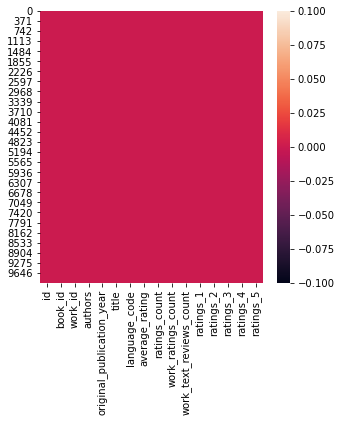

In [18]:
# We cross check after filling the missing values with the most occuring values in the column
plt.figure(figsize=(5,5))
sns.heatmap(books.isnull())
plt.show()

We would have observed white spaces in the heatmap if null values were present. 
Since there are none, that means there are no null values

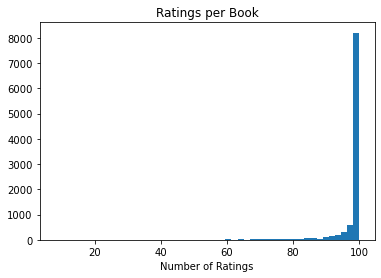

In [19]:
plt.hist(ratings.book_id.value_counts(), bins=50)
plt.title("Ratings per Book")
plt.xlabel("Number of Ratings")
plt.show()

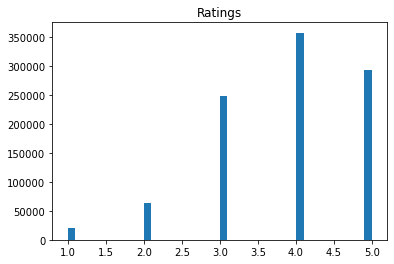

In [20]:
plt.hist(ratings['rating'], bins=40)
plt.title("Ratings")
plt.show()

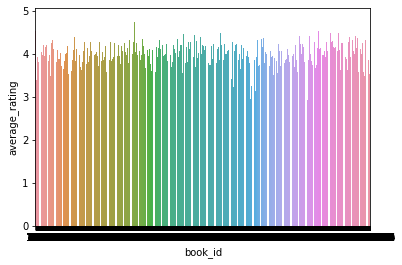

In [79]:
sns.barplot(y="average_rating", x="book_id" , data=books)

In [19]:
# Displaying list of books
i=0
for tn in books['title']:
    print(i,tn)
    i = i + 1    

0 The Hunger Games (The Hunger Games, #1)
1 Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
2 Twilight (Twilight, #1)
3 To Kill a Mockingbird
4 The Great Gatsby
5 The Fault in Our Stars
6 The Hobbit
7 The Catcher in the Rye
8 Angels & Demons  (Robert Langdon, #1)
9 Pride and Prejudice
10 The Kite Runner
11 Divergent (Divergent, #1)
12 1984
13 Animal Farm
14 The Diary of a Young Girl
15 The Girl with the Dragon Tattoo (Millennium, #1)
16 Catching Fire (The Hunger Games, #2)
17 Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)
18 The Fellowship of the Ring (The Lord of the Rings, #1)
19 Mockingjay (The Hunger Games, #3)
20 Harry Potter and the Order of the Phoenix (Harry Potter, #5)
21 The Lovely Bones
22 Harry Potter and the Chamber of Secrets (Harry Potter, #2)
23 Harry Potter and the Goblet of Fire (Harry Potter, #4)
24 Harry Potter and the Deathly Hallows (Harry Potter, #7)
25 The Da Vinci Code (Robert Langdon, #2)
26 Harry Potter and the Half-Blood Prince (Harry P

896 Rendezvous with Rama (Rama, #1)
897 The Queen of the Damned (The Vampire Chronicles, #3)
898 The Age of Innocence
899 The Selfish Gene
900 Year of Wonders
901 The Black Echo (Harry Bosch, #1; Harry Bosch Universe, #1)
902 Anthem
903 Gabriel's Inferno (Gabriel's Inferno, #1)
904 Cloudy With a Chance of Meatballs
905 Major Pettigrew's Last Stand
906 Vision in White (Bride Quartet, #1)
907 The Tenth Circle
908 The Throne of Fire (Kane Chronicles, #2)
909 Old Man's War (Old Man's War, #1)
910 Gerald's Game
911 Two for the Dough (Stephanie Plum, #2)
912 The Joy of Cooking
913 The Forever War (The Forever War, #1)
914 Insomnia
915 Reading Lolita in Tehran
916 The Blade Itself (The First Law, #1)
917 The Arctic Incident (Artemis Fowl, #2)
918 The Shipping News
919 The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing
920 All the Bright Places
921 Déjà Dead (Temperance Brennan, #1)
922 The Alchemyst (The Secrets of the Immortal Nicholas Flamel, #1)
923 The 

1977 The Liars' Club
1978 Dead Ever After (Sookie Stackhouse, #13)
1979 The Illustrated Man
1980 Naked (The Blackstone Affair, #1)
1981 Annihilation (Southern Reach, #1)
1982 Breathe (Sea Breeze, #1)
1983 The Runaway Bunny
1984 The Grand Design
1985 The Innocent Man: Murder and Injustice in a Small Town
1986 The Bachman Books
1987 Zealot: The Life and Times of Jesus of Nazareth
1988 Soul of the Fire (Sword of Truth, #5)
1989 The Art of Hearing Heartbeats
1990 Consider Phlebas (Culture, #1)
1991 The Magic of Thinking Big
1992 The Vampire Armand (The Vampire Chronicles, #6)
1993 Forever Too Far (Rosemary Beach, #3; Too Far, #3)
1994 A Storm of Swords: Steel and Snow (A Song of Ice and Fire, #3: Part 1 of 2)
1995 Pinocchio
1996 Grave Mercy (His Fair Assassin, #1)
1997 The Power of a Praying Wife
1998 Tropic of Cancer
1999 The Hour I First Believed
2000 Harry Potter: Film Wizardry
2001 The Death of Ivan Ilych
2002 Circling the Sun
2003 Travels with Charley: In Search of America
2004 The Do

3024 Plum Lovin' (Stephanie Plum, #12.5)
3025 Strengths Finder 2.0
3026 Another Roadside Attraction
3027 Sarum: The Novel of England
3028 Rage of Angels
3029 Vampire Academy Box Set (Vampire Academy, #1-4)
3030 Everlasting (The Immortals, #6)
3031 A Shade of Vampire (A Shade of Vampire, #1)
3032 The Right Stuff
3033 Cocktails for Three
3034 Vanish (Rizzoli & Isles, #5)
3035 Fluke: Or, I Know Why the Winged Whale Sings
3036 The Tell-Tale Heart
3037 Girl in Translation
3038 Panic (Panic, #1)
3039 Because of Low (Sea Breeze, #2)
3040 Leonardo's Notebooks
3041 Between Sisters
3042 Wayward (Wayward Pines, #2)
3043 Queste (Septimus Heap, #4)
3044 Finding Audrey
3045 The Moosewood Cookbook: Recipes from Moosewood Restaurant, Ithaca, New York
3046 Fox in Socks
3047 My Name is Red
3048 The Teachings of Don Juan: A Yaqui Way of Knowledge 
3049 The Sixth Man (Sean King & Michelle Maxwell, #5)
3050 Stone Soup
3051 The Warrior Heir (The Heir Chronicles, #1)
3052 Top Secret Twenty-One (Stephanie Plu

3913 Best Kept Secret (The Clifton Chronicles, #3)
3914 Spin (Spin, #1)
3915 Long Day's Journey Into Night
3916 Hellsing, Vol. 01 (Hellsing, #1)
3917 Soul Harvest: The World Takes Sides (Left Behind, #4)
3918 Twisted
3919 The Physician (Cole Family Trilogy, #1)
3920 Prodigal Son (Dean Koontz's Frankenstein, #1)
3921 How Do Dinosaurs Say Good Night?
3922 A Book of Five Rings: The Classic Guide to Strategy
3923 Tick Tock
3924 The Icarus Agenda
3925 Demon from the Dark (Immortals After Dark #10)
3926 The King (Black Dagger Brotherhood, #12)
3927 When Nietzsche Wept
3928 The Crossing (The Border Trilogy, #2)
3929 The Nicomachean Ethics
3930 Not a Fan: Becoming a Completely Committed Follower of Jesus
3931 Scott Pilgrim, Volume 3: Scott Pilgrim & The Infinite Sadness
3932 Spook: Science Tackles the Afterlife
3933 Songs of Innocence and of Experience
3934 Sugar Daddy (Travises, #1)
3935 The Berenstain Bears and the Messy Room
3936 Blaze
3937 Demon Lord of Karanda (The Malloreon, #3)
3938 His

4843 Half Magic (Tales of Magic, #1)
4844 Dawn of the Dreadfuls (Pride and Prejudice and Zombies, #0.5)
4845 Live to Tell (Detective D.D. Warren, #4)
4846 Lilly's Purple Plastic Purse
4847 84, Charing Cross Road
4848 Father Mine (Black Dagger Brotherhood, #6.5)
4849 Peace Is Every Step: The Path of Mindfulness in Everyday Life
4850 Electric Daisy, Vol. 1 (Dengeki Daisy, #1)
4851 Scrappy Little Nobody
4852 The Einstein Prophecy
4853 Started Early, Took My Dog (Jackson Brodie, #4)
4854 Batman: A Death in the Family
4855 TransAtlantic
4856 Eternal Kiss of Darkness (Night Huntress World, #2)
4857 The Spellman Files (The Spellmans, #1)
4858 Books of Blood: Volumes One to Three (Books of Blood #1-3)
4859 The Judas Strain (Sigma Force, #4)
4860 Searching for God Knows What
4861 The Missing Piece
4862 Fatherland
4863 Freedom™ (Daemon, #2)
4864 The Bridge of San Luis Rey
4865 White Nights
4866 Skin Trade (Anita Blake, Vampire Hunter #17)
4867 Jesus the Christ
4868 Disney's the Lion King
4869 Sh

5916 Chasing Perfect (Fool's Gold, #1)
5917 The Debutante Divorcee
5918 Life Application Study Bible: NIV
5919 The Wheel of Darkness (Pendergast, #8)
5920 Sleeping Giants (Themis Files, #1)
5921 Blackmoore
5922 The Sandman: Endless Nights
5923 The First Wives Club
5924 The Vanishing Act of Esme Lennox
5925 The Night Watch
5926 Mightier Than the Sword (The Clifton Chronicles, #5)
5927 Blood Canticle (The Vampire Chronicles, #10)
5928 Nature Girl
5929 Boy's Life
5930 Adam Bede
5931 Sister of My Heart
5932 The Housekeeper and the Professor
5933 H is for Homicide (Kinsey Millhone, #8)
5934 JPod
5935 The Face
5936 The Ascent of Money: A Financial History of the World
5937 Food: A Love Story
5938 The Impossible Knife of Memory
5939 Purgatorio (The Divine Comedy, #2)
5940 Deliver Us from Evil (A. Shaw, #2)
5941 One Last Thing Before I Go
5942 By the Time You Read This, I'll Be Dead
5943 The Girls of Atomic City: The Untold Story of the Women Who Helped Win World War II
5944 City of Night (Dea

7010 Curious George Rides a Bike
7011 Methuselah's Children
7012 Hana (Delirium, #1.5)
7013 Preacher, Volume 8: All Hell's a-Coming
7014 The Little Sisters of Eluria (The Dark Tower, #0.5)
7015 Inside, Outside, Upside Down (Berenstain Bears Bright and Early Board Book)
7016 The First Rule (Elvis Cole, #13; Joe Pike, #2)
7017 The Magical Worlds of Harry Potter: A Treasury of Myths, Legends, and Fascinating Facts
7018 The Dot
7019 Forest Born (The Books of Bayern, #4)
7020 The Damnation Game
7021 Ignorance
7022 Private (Private, #1)
7023 استمتع بحياتك
7024 Sisters
7025 The Difference Engine 
7026 Preacher, Volume 7: Salvation
7027 How Will You Measure Your Life?
7028 I Want My Hat Back
7029 The Lone Drow (Forgotten Realms: Hunter's Blades, #2; Legend of Drizzt, #15)
7030 Why We Suck: A Feel Good Guide to Staying Fat, Loud, Lazy and Stupid
7031 Bonjour tristesse
7032 Cometh the Hour (The Clifton Chronicles, #6)
7033 A Walk Across the Sun
7034 House of Suns
7035 A Shadow of Light (A Shade 

8096 100 Bullets, Vol. 1: First Shot, Last Call
8097 The Awakened Mage (Kingmaker, Kingbreaker, #2)
8098 A Ring of Endless Light (Austin Family, #4)
8099 How to Save a Life
8100 The 5 Greatest Warriors (Jack West Jr, #3)
8101 Brotherhood in Death (In Death, #42)
8102 Arrow's Flight (Heralds of Valdemar, #2)
8103 The Tail of Emily Windsnap (Emily Windsnap, #1)
8104 Blackout: Remembering the Things I Drank to Forget
8105 The Invaders (Brotherband Chronicles, #2)
8106 The Moon and Sixpence
8107 The Last Girl (The Dominion Trilogy, #1)
8108 The Absolute Sandman, Volume One
8109 Rock Chick Regret (Rock Chick, #7)
8110 Dicey's Song (Tillerman Cycle, #2)
8111 The Walking Dead, Book Three (The Walking Dead #25-36)
8112 A Quest of Heroes (The Sorcerer's Ring, #1)
8113 The Woman in the Dunes
8114 Aunt Julia and the Scriptwriter
8115 Queen Song (Red Queen, #0.1)
8116 Transmetropolitan, Vol. 3: Year of the Bastard (Transmetropolitan, #3)
8117 The Prettiest One
8118 Falling into Place
8119 A Severe

9075 Preach My Gospel: A Guide To Missionary Service
9076 The Last Dragonslayer (The Chronicles of Kazam, #1)
9077 Orientalism
9078 Like a Fire Burning (The Work and the Glory, #2)
9079 Friends and Lovers
9080 Molly Moon's Incredible Book of Hypnotism (Molly Moon, #1)
9081 Contest
9082 Songbook
9083 The Greatest Generation
9084 The Minority Report
9085 Luck in the Shadows (Nightrunner, #1)
9086 The Lemonade War (The Lemonade War, #1)
9087 The Knight at Dawn (Magic Tree House, #2)
9088 The Arrangement: The Ferro Family (The Arrangement, #1)
9089 Winter in Tokyo
9090 Help for the Haunted
9091 Death Note, Vol. 6: Give-and-Take (Death Note, #6)
9092 The Lightning Thief: The Graphic Novel (Percy Jackson and the Olympians, #1)
9093 Mrs. Kennedy and Me: An Intimate Memoir
9094 Shoeless Joe
9095 When Crickets Cry
9096 This Changes Everything: Capitalism vs. The Climate
9097 Aloha from Hell (Sandman Slim, #3)
9098 Until Lilly (Until, #3)
9099 A Walk Across America
9100 Try Me (One Night with So

9950 The Girl with No Shadow (Chocolat, #2)
9951 Sherlock Holmes of Baker Street: A Life of the World's First Consulting Detective
9952 Marked in Flesh (The Others, #4)
9953 Horrorstör
9954 Wild Cards (Wild Cards, #1)
9955 Astonishing X-Men, Volume 2: Dangerous
9956 Inside of a Dog: What Dogs See, Smell, and Know
9957 The Pacific
9958 Proper Gauge (Wool, #2)
9959 The Prize Winner of Defiance, Ohio: How My Mother Raised 10 Kids on 25 Words or Less
9960 The Comfort of Strangers
9961 Cunt: A Declaration of Independence
9962 Krondor: The Betrayal (The Riftwar Legacy, #1)
9963 The Mime Order (The Bone Season, #2)
9964 Mister B. Gone
9965 The Ground Beneath Her Feet
9966 الحرافيش
9967 The Story of the Trapp Family Singers
9968 Gut: The Inside Story of Our Body’s Most Underrated Organ
9969 The Virgin Cure
9970 The Tycoon's Revenge (Baby for the Billionaire, #1)
9971 Bagombo Snuff Box
9972 The Seven Principles for Making Marriage Work: A Practical Guide from the Country's Foremost Relationship

#### Preparing the data

In [20]:
# Top 10 rated books
toprated = books.sort_values('average_rating', ascending=False)[0:10]

# Top 10 popular books
popular = books.sort_values('ratings_count', ascending=False)[0:10]

In [21]:
print("Top 10 rated books are -")
print("")
for i in toprated['title']:
    print(i)

print("")
print("------------------------------------")
print("")

print("Top 10 popular books are -")
print("")
for j in popular['title']:
    print(j)

Top 10 rated books are -

The Complete Calvin and Hobbes
Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)
Words of Radiance (The Stormlight Archive, #2)
Mark of the Lion Trilogy
ESV Study Bible
It's a Magical World: A Calvin and Hobbes Collection
There's Treasure Everywhere: A Calvin and Hobbes Collection
Harry Potter Boxset (Harry Potter, #1-7)
Harry Potter Collection (Harry Potter, #1-6)
The Indispensable Calvin and Hobbes

------------------------------------

Top 10 popular books are -

The Hunger Games (The Hunger Games, #1)
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)
Twilight (Twilight, #1)
To Kill a Mockingbird
The Great Gatsby
The Fault in Our Stars
The Hobbit
The Catcher in the Rye
Pride and Prejudice
Angels & Demons  (Robert Langdon, #1)


In [28]:
# We use merge instead of concat because merge offers flexibility, concat stacks up multiple dataframes
maindf=pd.merge(books,ratings)
maindf.tail()

,id,book_id,work_id,authors,original_publication_year,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,user_id,rating
79696,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,46715,4
79697,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,47073,4
79698,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,49663,3
79699,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,50305,3
79700,10000,8914,11817,John Keegan,1998.0,The First World War,eng,4.0,9162,9700,364,117,345,2031,4138,3069,52244,4


Since both our dataframes books and ratings have no null values therefore maindf wont have null values as well

In [29]:
maindf.shape

(79701, 18)

In [30]:
maindf.info() # getting info on the merged dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79701 entries, 0 to 79700
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         79701 non-null  int64  
 1   book_id                    79701 non-null  int64  
 2   work_id                    79701 non-null  int64  
 3   authors                    79701 non-null  object 
 4   original_publication_year  79701 non-null  float64
 5   title                      79701 non-null  object 
 6   language_code              79701 non-null  object 
 7   average_rating             79701 non-null  float64
 8   ratings_count              79701 non-null  int64  
 9   work_ratings_count         79701 non-null  int64  
 10  work_text_reviews_count    79701 non-null  int64  
 11  ratings_1                  79701 non-null  int64  
 12  ratings_2                  79701 non-null  int64  
 13  ratings_3                  79701 non-null  int

In [31]:
corr_matrix=maindf.corr()

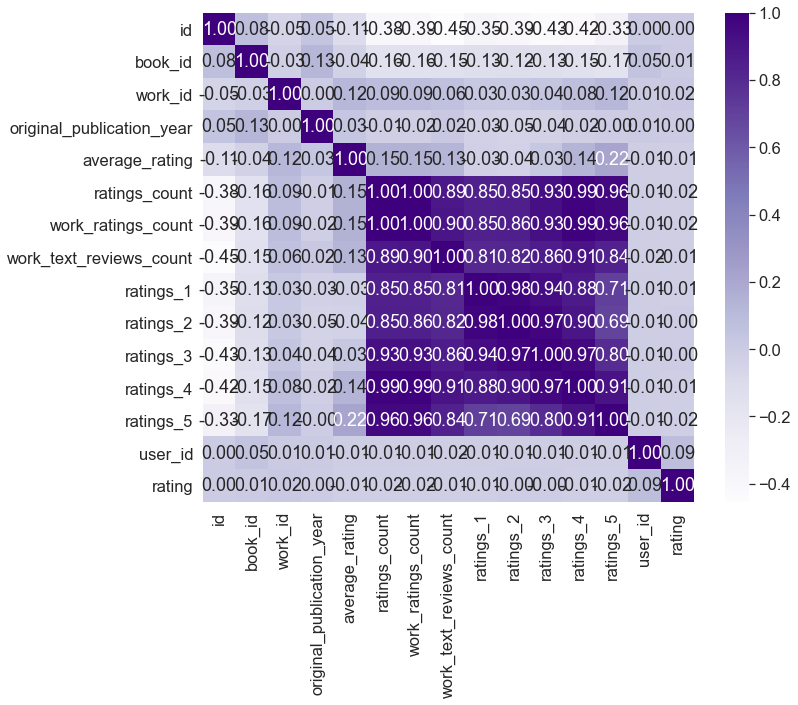

In [32]:
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, cmap='Purples', annot=True, fmt=".2f")
sns.set(font_scale=1.5)

We observe some strong correlations

## Content Based Recommendation

In this system, user will enter the ID of the book they like, and will get recommendations on similar content.
Item similarity based system

In [33]:
# Sparse matrix for books and users

from scipy.sparse import coo_matrix

matrix = coo_matrix((maindf['rating'],(maindf['book_id'], maindf['user_id'])))
print(matrix)

  (3, 314)	3
  (3, 588)	1
  (3, 2077)	2
  (3, 2487)	3
  (3, 2900)	3
  (3, 3662)	4
  (3, 4536)	1
  (3, 5115)	4
  (3, 5272)	5
  (3, 5461)	2
  (3, 5885)	4
  (3, 6063)	5
  (3, 6630)	5
  (3, 6634)	3
  (3, 7001)	4
  (3, 9246)	1
  (3, 9731)	2
  (3, 9771)	3
  (3, 10140)	3
  (3, 10246)	1
  (3, 10249)	5
  (3, 10509)	1
  (3, 10610)	1
  (3, 10751)	1
  (3, 10944)	1
  :	:
  (8914, 30322)	4
  (8914, 30554)	3
  (8914, 33033)	3
  (8914, 33090)	5
  (8914, 33277)	4
  (8914, 33928)	3
  (8914, 34333)	4
  (8914, 35115)	5
  (8914, 35566)	5
  (8914, 36909)	3
  (8914, 37525)	4
  (8914, 37831)	3
  (8914, 38305)	4
  (8914, 39001)	3
  (8914, 40307)	4
  (8914, 40696)	3
  (8914, 42073)	3
  (8914, 44361)	2
  (8914, 45695)	4
  (8914, 46317)	3
  (8914, 46715)	4
  (8914, 47073)	4
  (8914, 49663)	3
  (8914, 50305)	3
  (8914, 52244)	4


In [34]:
matrix.shape # shape of the sparse matrix

(9999, 53425)

In [35]:
# Initialising variables for the system

List=[] # this will be used to maintain a list of dictionaries

# Each dictionary corresponds to a single book
# Both dictionaries take numeric values
Map = {}
revMap = {}
ptr=0            # pointer

testdf = ratings # we copy the dataset for testing
testdf= testdf[['user_id','rating']].groupby(testdf['book_id'])

# The user_id is the key, while rating given by the user for the book is its value (in the dictionary)

for i in testdf.groups.keys():
    temp={}                                # we create a temporary dictionary for iteratinos
    groupdf = testdf.get_group(i)          # extracting the keys
    for j in range(0,len(groupdf)): 
        temp[groupdf.iloc[j,0]]=groupdf.iloc[j,1]
    Map[ptr]= i
    revMap[i] = ptr
    ptr=ptr+1
    List.append(temp)                      # here we append the dictionary formed in the list

In [ ]:
testdf.to_csv("testdf.csv")
groupdf.to_csv("groupdf.csv")
books.to_csv("books2.csv")

In [36]:
Map

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26,
 26: 27,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 34,
 34: 35,
 35: 36,
 36: 37,
 37: 38,
 38: 39,
 39: 40,
 40: 41,
 41: 42,
 42: 43,
 43: 44,
 44: 45,
 45: 46,
 46: 47,
 47: 48,
 48: 49,
 49: 50,
 50: 51,
 51: 52,
 52: 53,
 53: 54,
 54: 55,
 55: 56,
 56: 57,
 57: 58,
 58: 59,
 59: 60,
 60: 61,
 61: 62,
 62: 63,
 63: 64,
 64: 65,
 65: 66,
 66: 67,
 67: 68,
 68: 69,
 69: 70,
 70: 71,
 71: 72,
 72: 73,
 73: 74,
 74: 75,
 75: 76,
 76: 77,
 77: 78,
 78: 79,
 79: 80,
 80: 81,
 81: 82,
 82: 83,
 83: 84,
 84: 85,
 85: 86,
 86: 87,
 87: 88,
 88: 89,
 89: 90,
 90: 91,
 91: 92,
 92: 93,
 93: 94,
 94: 95,
 95: 96,
 96: 97,
 97: 98,
 98: 99,
 99: 100,
 100: 101,
 101: 102,
 102: 103,
 103: 104,
 104: 105,
 105: 106,
 106: 107,
 107: 108,
 108: 109,
 109: 110,
 110: 11

In [37]:
revMap

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [38]:
# Now we use DictVectorizer() function to create vectors corresponding to each book.
# Each point in the vector space represents a book.

from sklearn.feature_extraction import DictVectorizer
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(List)
vector

<10000x53424 sparse matrix of type '<class 'numpy.float64'>'
	with 979478 stored elements in Compressed Sparse Row format>

In [39]:
# Computes similarity b/w vector lists

from sklearn.metrics.pairwise import cosine_similarity
cos_similarity = cosine_similarity(vector)
cos_similarity

array([[1.        , 0.55552614, 0.50915226, ..., 0.        , 0.        ,
        0.        ],
       [0.55552614, 1.        , 0.52021603, ..., 0.        , 0.        ,
        0.00692082],
       [0.50915226, 0.52021603, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00692082, 0.        , ..., 0.        , 0.        ,
        1.        ]])

We observe that it is a 2D matrix

Visualising the 2D Matrix

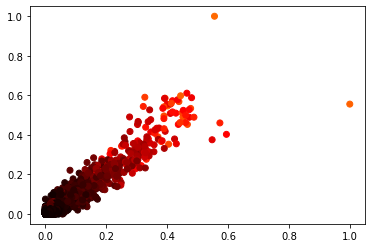

In [121]:
plt.scatter(cos_similarity[:, 0], cos_similarity[:, 1], c=cos_similarity[:, 2], cmap='hot')
plt.show()

In [40]:
# Defining functions for the recommender system 
def printDetails(bookID):
    
    print("Title:", books[books['id']==bookID]['title'].values[0])
    print("Author:",books[books['id']==bookID]['authors'].values[0])
    print("Publication Year:",books[books['id']==bookID]['original_publication_year'].values[0])
    print("Language:",books[books['id']==bookID]['language_code'].values[0])
    print("Book ID:",books[books['id']==bookID]['id'].values[0])
    print(" ")

# Function argsort(), returns the indices which would sort an array. Used with 2D arrays also.
# Cos_similarity is a 2D matrix which we will use here
def getRecommandations(bookID):
    r = revMap[bookID]
    argsort = np.argsort(cos_similarity[r])
    
    print(" ")
    print("+----------------------+")
    print("Books you might like")
    print("+----------------------+")
    print(" ")
    
    for i in argsort[-10:][:]:
        printDetails(Map[i])
        
# Displays popular books to new users to start from
def newRecommandations():
    
    print("")
    print("+-------------------------------+")
    print("Popular books to start from")
    print("+-------------------------------+")
    
    for j in popular['title']:
        print(j)

In [41]:
books['id']

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: id, Length: 10000, dtype: int64

In [43]:
# Input from user

yynn = input("Are you a new user? ")
if (yynn=="Yes")or(yynn=="yes")or(yynn=="y")or(yynn=="Y"):
    newRecommandations()

else:
    bookID = int(input("Enter the ID of your favourite book to get recommendations:- "))
    getRecommandations(bookID)

Are you a new user? no
Enter the ID of your favourite book to get recommendations:- 456
 
+----------------------+
Books you might like
+----------------------+
 
Title: For Whom the Bell Tolls
Author: Ernest Hemingway
Publication Year: 1940.0
Language: eng
Book ID: 395
 
Title: The Importance of Being Earnest
Author: Oscar Wilde
Publication Year: 1895.0
Language: eng
Book ID: 427
 
Title: David Copperfield
Author: Charles Dickens, Jeremy Tambling
Publication Year: 1849.0
Language: eng
Book ID: 590
 
Title: The Iliad
Author: Homer, Robert Fagles, Frédéric Mugler, Bernard Knox
Publication Year: -750.0
Language: eng
Book ID: 341
 
Title: Oliver Twist
Author: Charles Dickens, George Cruikshank, Philip Horne
Publication Year: 1838.0
Language: eng
Book ID: 361
 
Title: Gulliver's Travels
Author: Jonathan Swift, Robert DeMaria Jr.
Publication Year: 1726.0
Language: eng
Book ID: 529
 
Title: Othello
Author: William Shakespeare
Publication Year: 1603.0
Language: eng
Book ID: 353
 
Title: The G

Top 10 recommnedations